* <i>This notebook is a supliment to a medium post titled:</i>
### Saving Big Pandas DataFrames: The Ultimate Guide to Choosing the Right File Format



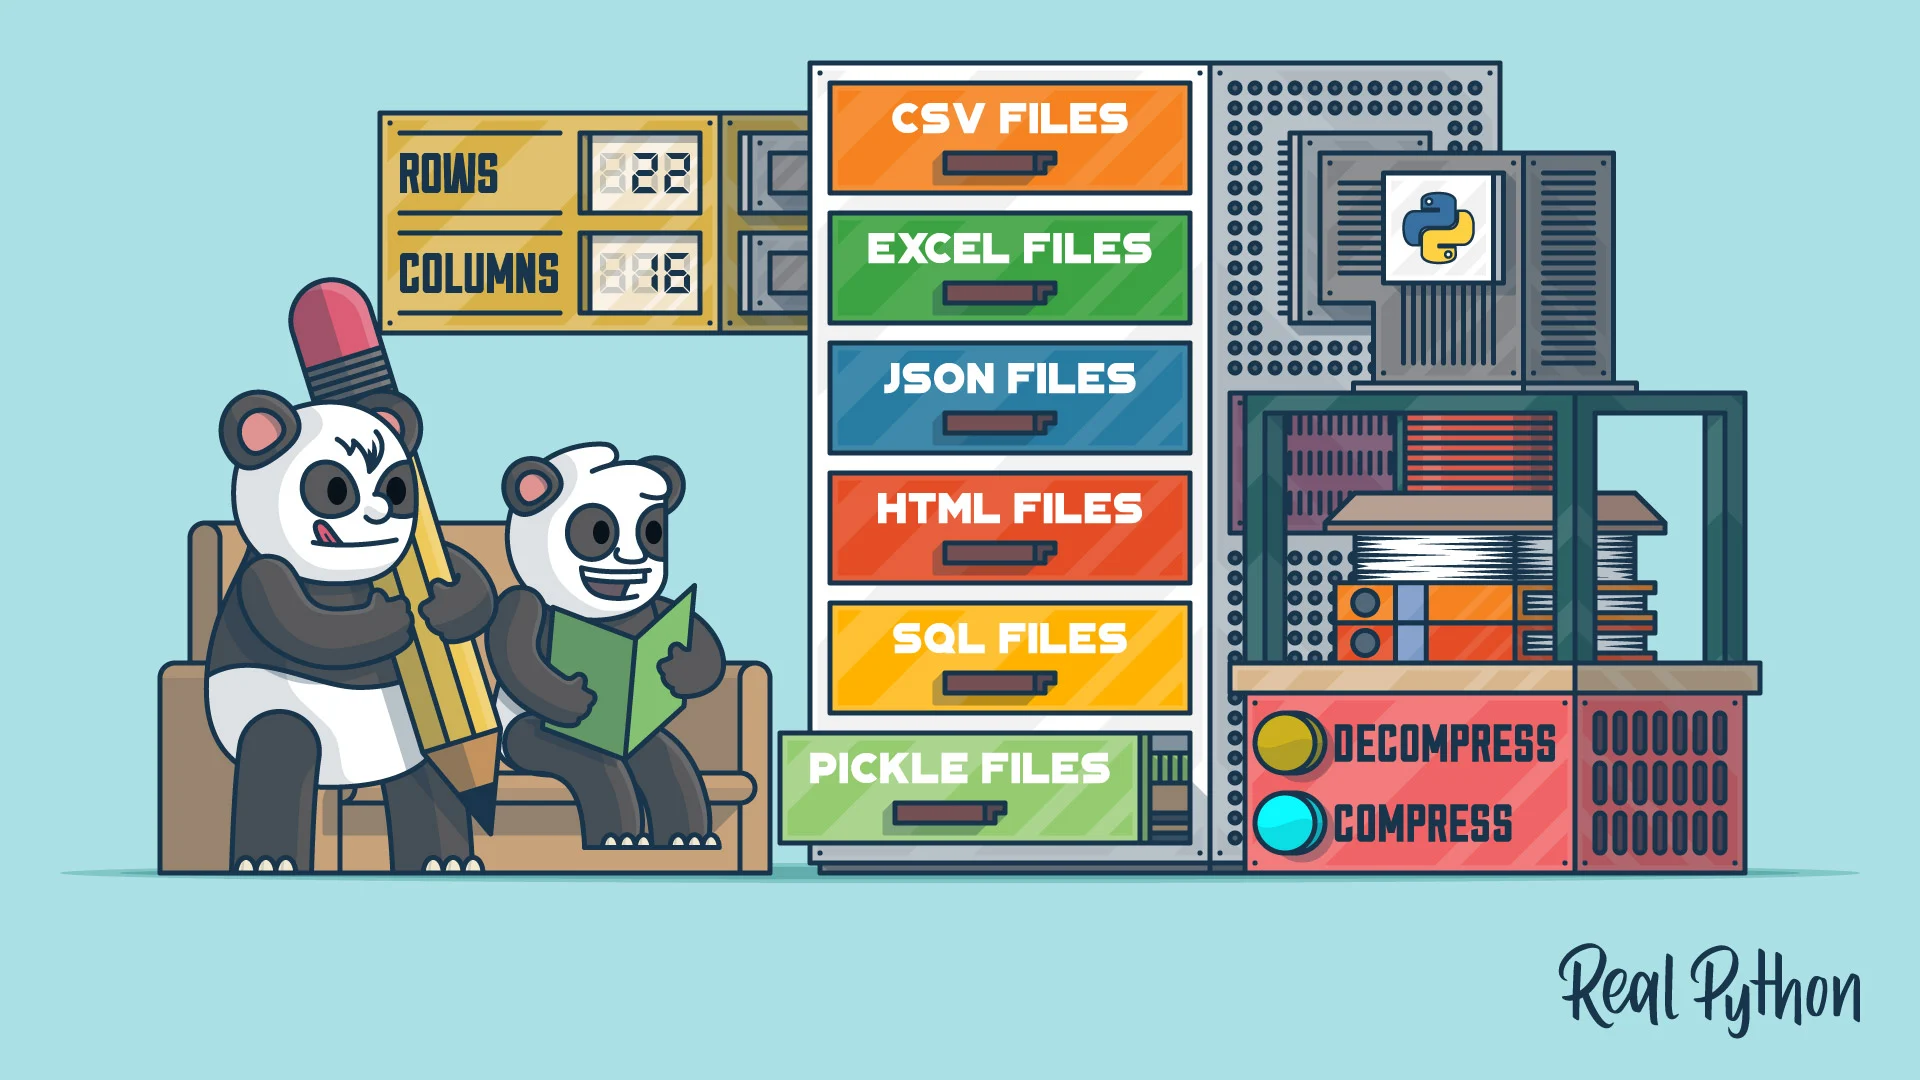

https://medium.com/@ahmedalmakhamreh/what-is-the-best-way-to-save-big-pandas-dataframes-to-your-local-disk-5860c50f1f0e

####  Uncomment and run the cell below if you dont have the following libraries installed 

In [1]:
# !pip install pandas
# !pip install pyarrow
# !pip install tqdm
# !pip install seaborn

In [2]:
import os
from tqdm import tqdm
import pandas as pd
import time

# local path to book's plain text
books_path = 'Z:\\medium blogs\\pandas dataframes\\books1\\books1\\epubtxt'

In [3]:
# read the URLs
urls = open('Z:\\medium blogs\\pandas dataframes\\books1\\books1\\2020-08-27-epub_urls.txt').readlines()

# read book names to iterate through
book_names = os.listdir(books_path)

mydic = {}

# nested loop to match urls with book names and retrieve books' content
for url in tqdm(urls):
    for book in book_names:
        
        # matching urls to book names
        if url.split('/')[-1].strip() in book:
            
            # dictionary key: bookName, values: [url, book plain text]
            bookNAme = book.split('.') 
            mydic[book] = [url, open(os.path.join(books_path, book), 'r', encoding = 'utf8').read()]  

v = list(mydic.values())

# create a dataframe
df = pd.DataFrame({'book_name': list(mydic.keys()) , 'url':[ins[0] for ins in v],'full_text': [ins[1] for ins in v]})

# compute and add text_length column
df['text_length']  = df['full_text'].str.len()


100%|██████████| 18060/18060 [04:27<00:00, 67.46it/s] 


In [4]:
df.head(10)

,book_name,url,full_text,text_length
0,a-really-bad-idea.epub.txt,https://www.smashwords.com/books/download/9331...,\n# A Really Bad Idea\n\n## Jeannine Colette\...,513685
1,the-gates-to-heaven.epub.txt,https://www.smashwords.com/books/download/1029...,\n## Max Maximov\n\nThe Gates to Heaven\n\nA ...,186430
2,inspiration-to-live-your-magic.epub.txt,https://www.smashwords.com/books/download/1233...,\n\n# Inspiration to LIVE YOUR(TM) MAGIC!\n\n7...,204298
3,redemption-lake.epub.txt,https://www.smashwords.com/books/download/6365...,"\n\nTucson, Arizona – Eighteen-year-old Matt G...",527243
4,if-the-shoe-fits.epub.txt,https://www.smashwords.com/books/download/3613...,\n\n## IF THE SHOE FITS\n\nby\n\n### Laurie Le...,273111
5,wild-on-you.epub.txt,https://www.smashwords.com/books/download/9545...,"\n# Wild On You\n\n## Includes the Prequel, W...",572694
6,hostile-witness-a-josie-bates-thriller.epub.txt,https://www.smashwords.com/books/download/5314...,\n# Hostile Witness\n\n## Rebecca Forster\n\n...,591844
7,mountain-man-the-smith-brothers-1.epub.txt,https://www.smashwords.com/books/download/8241...,\n# MOUNTAIN MAN\n\n### The Smith Brothers #1...,168969
8,a-heart-not-easily-broken.epub.txt,https://www.smashwords.com/books/download/4678...,\n# A Heart Not Easily Broken\n\n##\n\n### M....,449252
9,marrying-mister-perfect.epub.txt,https://www.smashwords.com/books/download/5171...,\n\n### Marrying Mister Perfect\n\nby\n\nLizzi...,442548


In [5]:
df.tail(10)

,book_name,url,full_text,text_length
17594,discover-the-key-to-your-freedom-life-liberati...,https://www.smashwords.com/books/download/5876...,\n\n## Discover the Key to Your Freedom\n\n###...,238216
17595,secrets-of-amsterdam.epub.txt,https://www.smashwords.com/books/download/4175...,\n#\n\nSECRETS OF AMSTERDAM\n\nPeter de Ruite...,162440
17596,ddse-book-4.epub.txt,https://www.smashwords.com/books/download/7283...,\n\nDDsE\n\nBook 4\n\nSue Perry\n\nCopyright 2...,112469
17597,the-catholic-digital-news-2017-03-04-special-i...,https://www.smashwords.com/books/download/7083...,"\n\n**VOLUME 3, ISSUE 1 • MARCH 4, 2017**\n...",243741
17598,the-legendary-mad-matilda.epub.txt,https://www.smashwords.com/books/download/7442...,\nTHE LEGENDARY MAD MATILDA\n\nSmashwords Edi...,341896
17599,death-of-a-gas-guzzler-a-controversial-approac...,https://www.smashwords.com/books/download/1089...,\n### Death of a Gas Guzzler:\n\nA Controvers...,273043
17600,a-christian-horror-story-the-dark-visitor.epub...,https://www.smashwords.com/books/download/1040...,\n\nTHE DARK VISITOR\n\nA Christian Horror Sto...,148081
17601,this-is-a-trap-door-book-1.epub.txt,https://www.smashwords.com/books/download/1039...,\nThis is a Trap Door\n\nby Zachariah Bennet ...,192587
17602,see-here-detective-vanek-a-vanek-mystery.epub.txt,https://www.smashwords.com/books/download/5955...,"\nSee Here, Detective Vanek,\n\na Vanek Myste...",376935
17603,1111-episode-2-bill-hicks-is-my-best-friend-ma...,https://www.smashwords.com/books/download/8729...,\n\n11 11 Episode 2: Bill Hicks is my Best Fri...,136956


### <i>text_length</i> column stats

In [6]:
print('Minimum book text length:', df.text_length.min())
print('Maximum book text length: ', df.text_length.max())
print('Median book text length: ', df.text_length.median())
print('Average book text length: ', round(df.text_length.mean(), 2))



Minimum book text length: 9
Maximum book text length:  23673363
Median book text length:  300347.0
Average book text length:  371871.17


# Saving the dataframe into local disk

In [7]:
%%time

# save df as feather
start = time.time()
df.to_feather('df_result.feather')
end = time.time()
feather_time_write = end - start

CPU times: total: 41.1 s
Wall time: 1min 28s


In [8]:
%%time

# save df as pickle
start = time.time()
df.to_pickle('df_result.pickle')
end = time.time()
pickle_time_write = end - start

CPU times: total: 18.1 s
Wall time: 33.4 s


In [9]:
%%time

# save df as parquet
start = time.time()
df.to_parquet('df_result.parquet')
end = time.time()
parquet_time_write = end - start

CPU times: total: 32 s
Wall time: 36.6 s


In [10]:
%%time

# save df as CSV
start = time.time()
df.to_csv('df_result.csv', index = False) 
end = time.time()
csv_time_write = end - start

CPU times: total: 1min 34s
Wall time: 2min 34s


## Visualizing saving time  

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

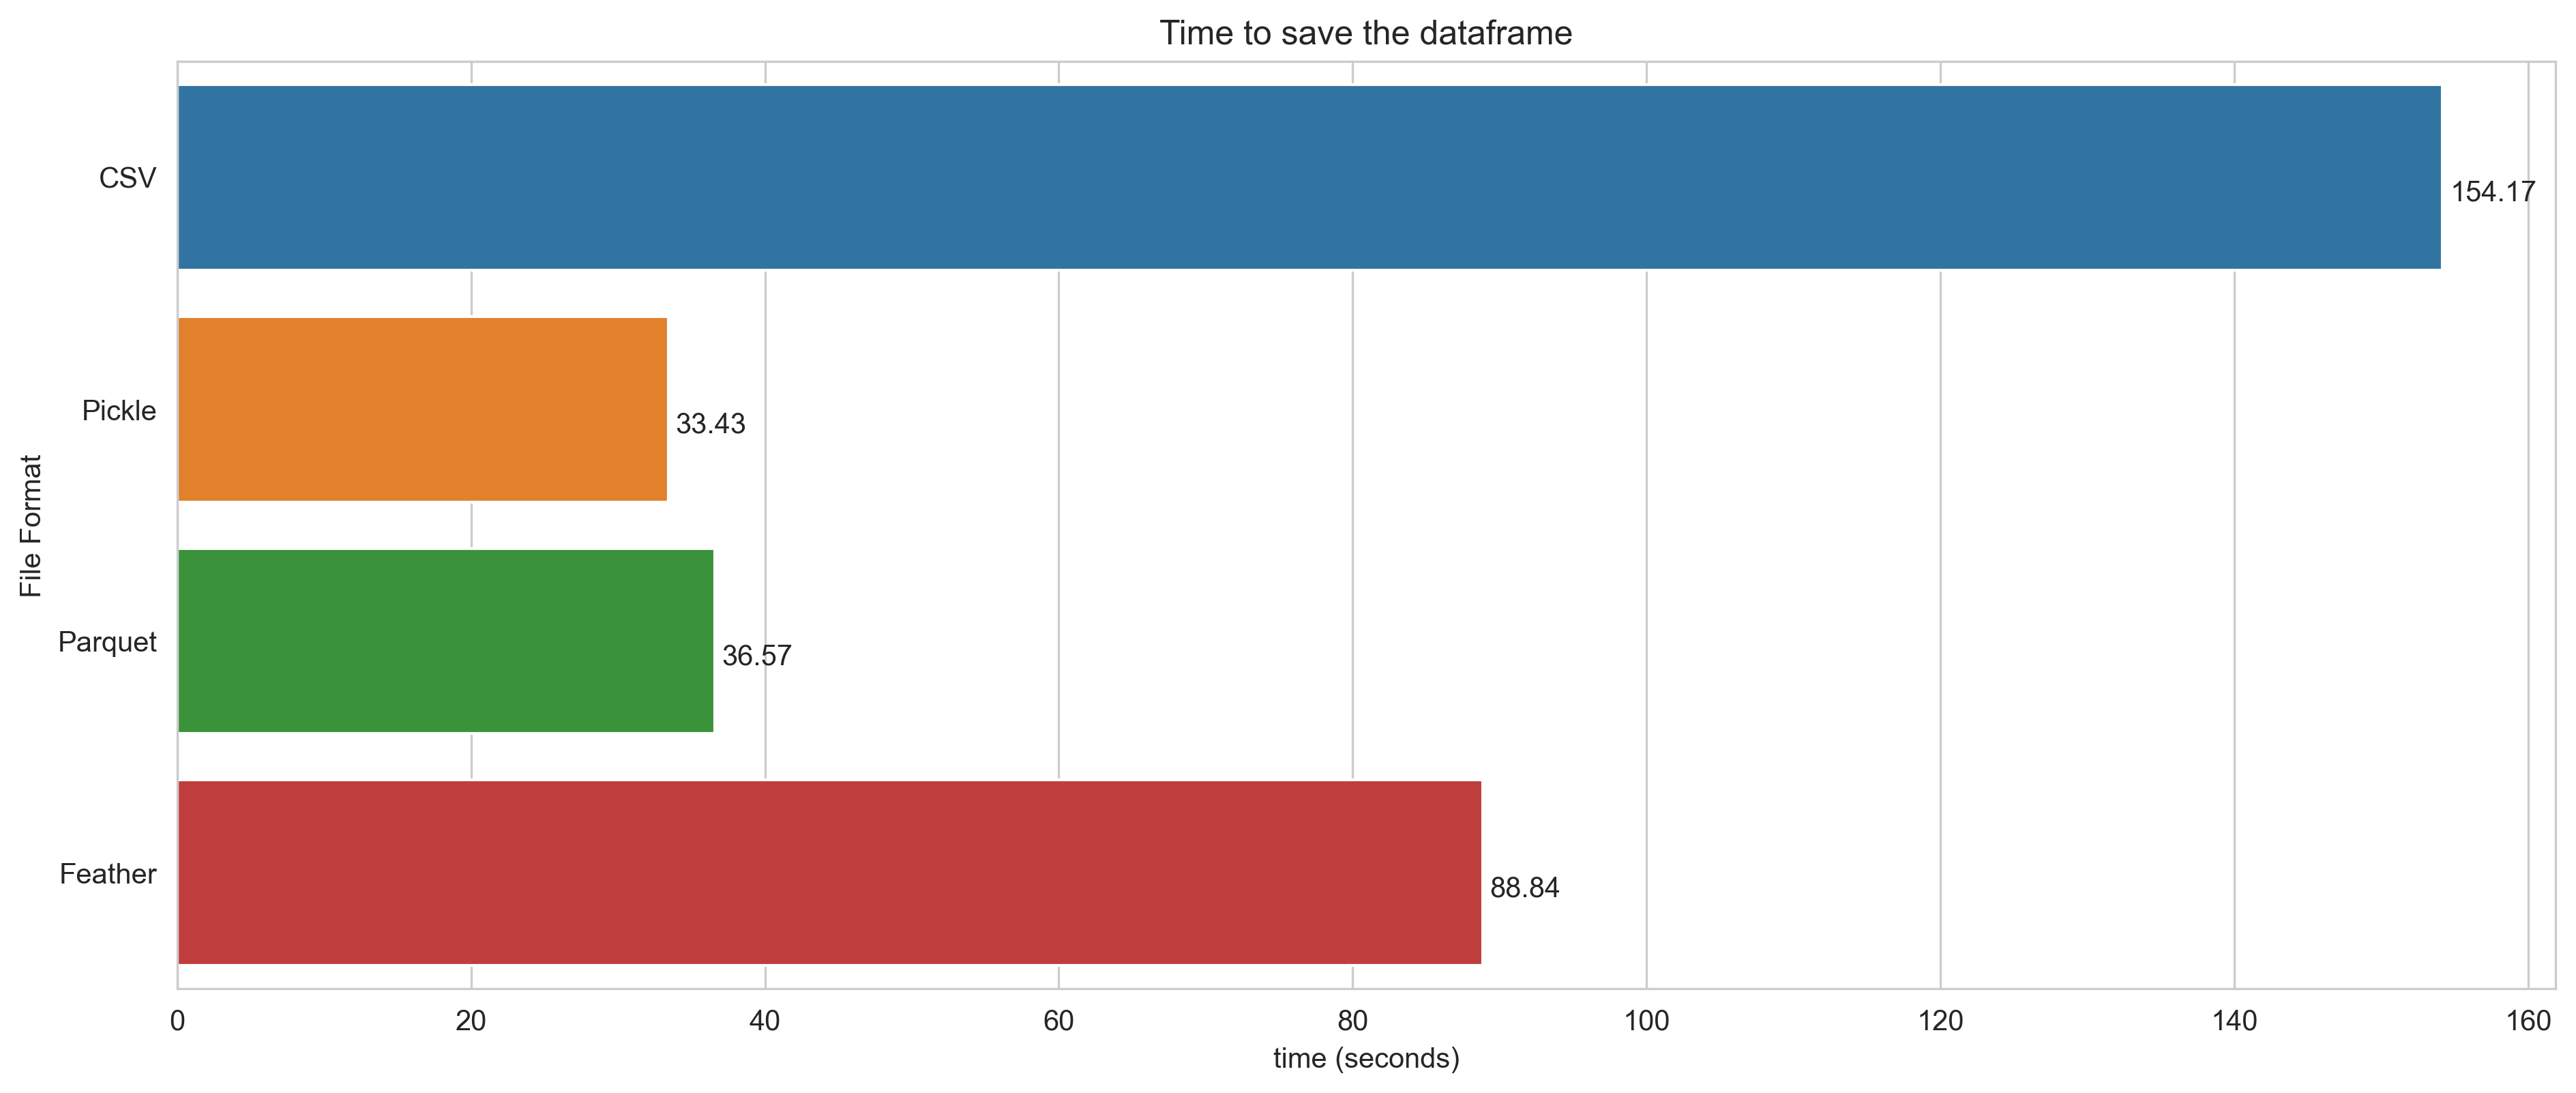

In [12]:
%matplotlib inline

file_type = ['CSV', 'Pickle', 'Parquet', 'Feather']
processing_time = [csv_time_write, pickle_time_write, parquet_time_write, feather_time_write]

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6), dpi=300)
plot = sns.barplot(x=processing_time, y=file_type, orient='h')

# Add labels and title
plt.xlabel('time (seconds)')
plt.ylabel('File Format')
plt.title("Time to save the dataframe")

# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.2f'), (p.get_width()+0.5, p.get_y()+0.5))
    
# Show the plot
plt.show()

### Note: save/write time will vary depending on the computer resources 

## Loading the dataframes from local disk

In [18]:
%%time

# feather read
start = time.time()
df_f = pd.read_feather('df_result.feather')
end = time.time()
feather_time_read = end - start

CPU times: total: 12 s
Wall time: 1min 13s


In [19]:
%%time 

# pickle read
start = time.time()
df_f = pd.read_pickle('df_result.pickle')
end = time.time()
pickle_time_read = end - start

CPU times: total: 20.1 s
Wall time: 50.2 s


In [15]:
%%time

# parquet read
start = time.time()
df_f = pd.read_parquet('df_result.parquet')
end = time.time()
parquet_time_read = end - start

CPU times: total: 23 s
Wall time: 1min 10s


In [16]:
%%time

# CSV read
start = time.time()
df_f = pd.read_csv('df_result.csv')
end = time.time()
csv_time_read = end - start

CPU times: total: 1min 57s
Wall time: 2min 9s


## Visualizing loading time  

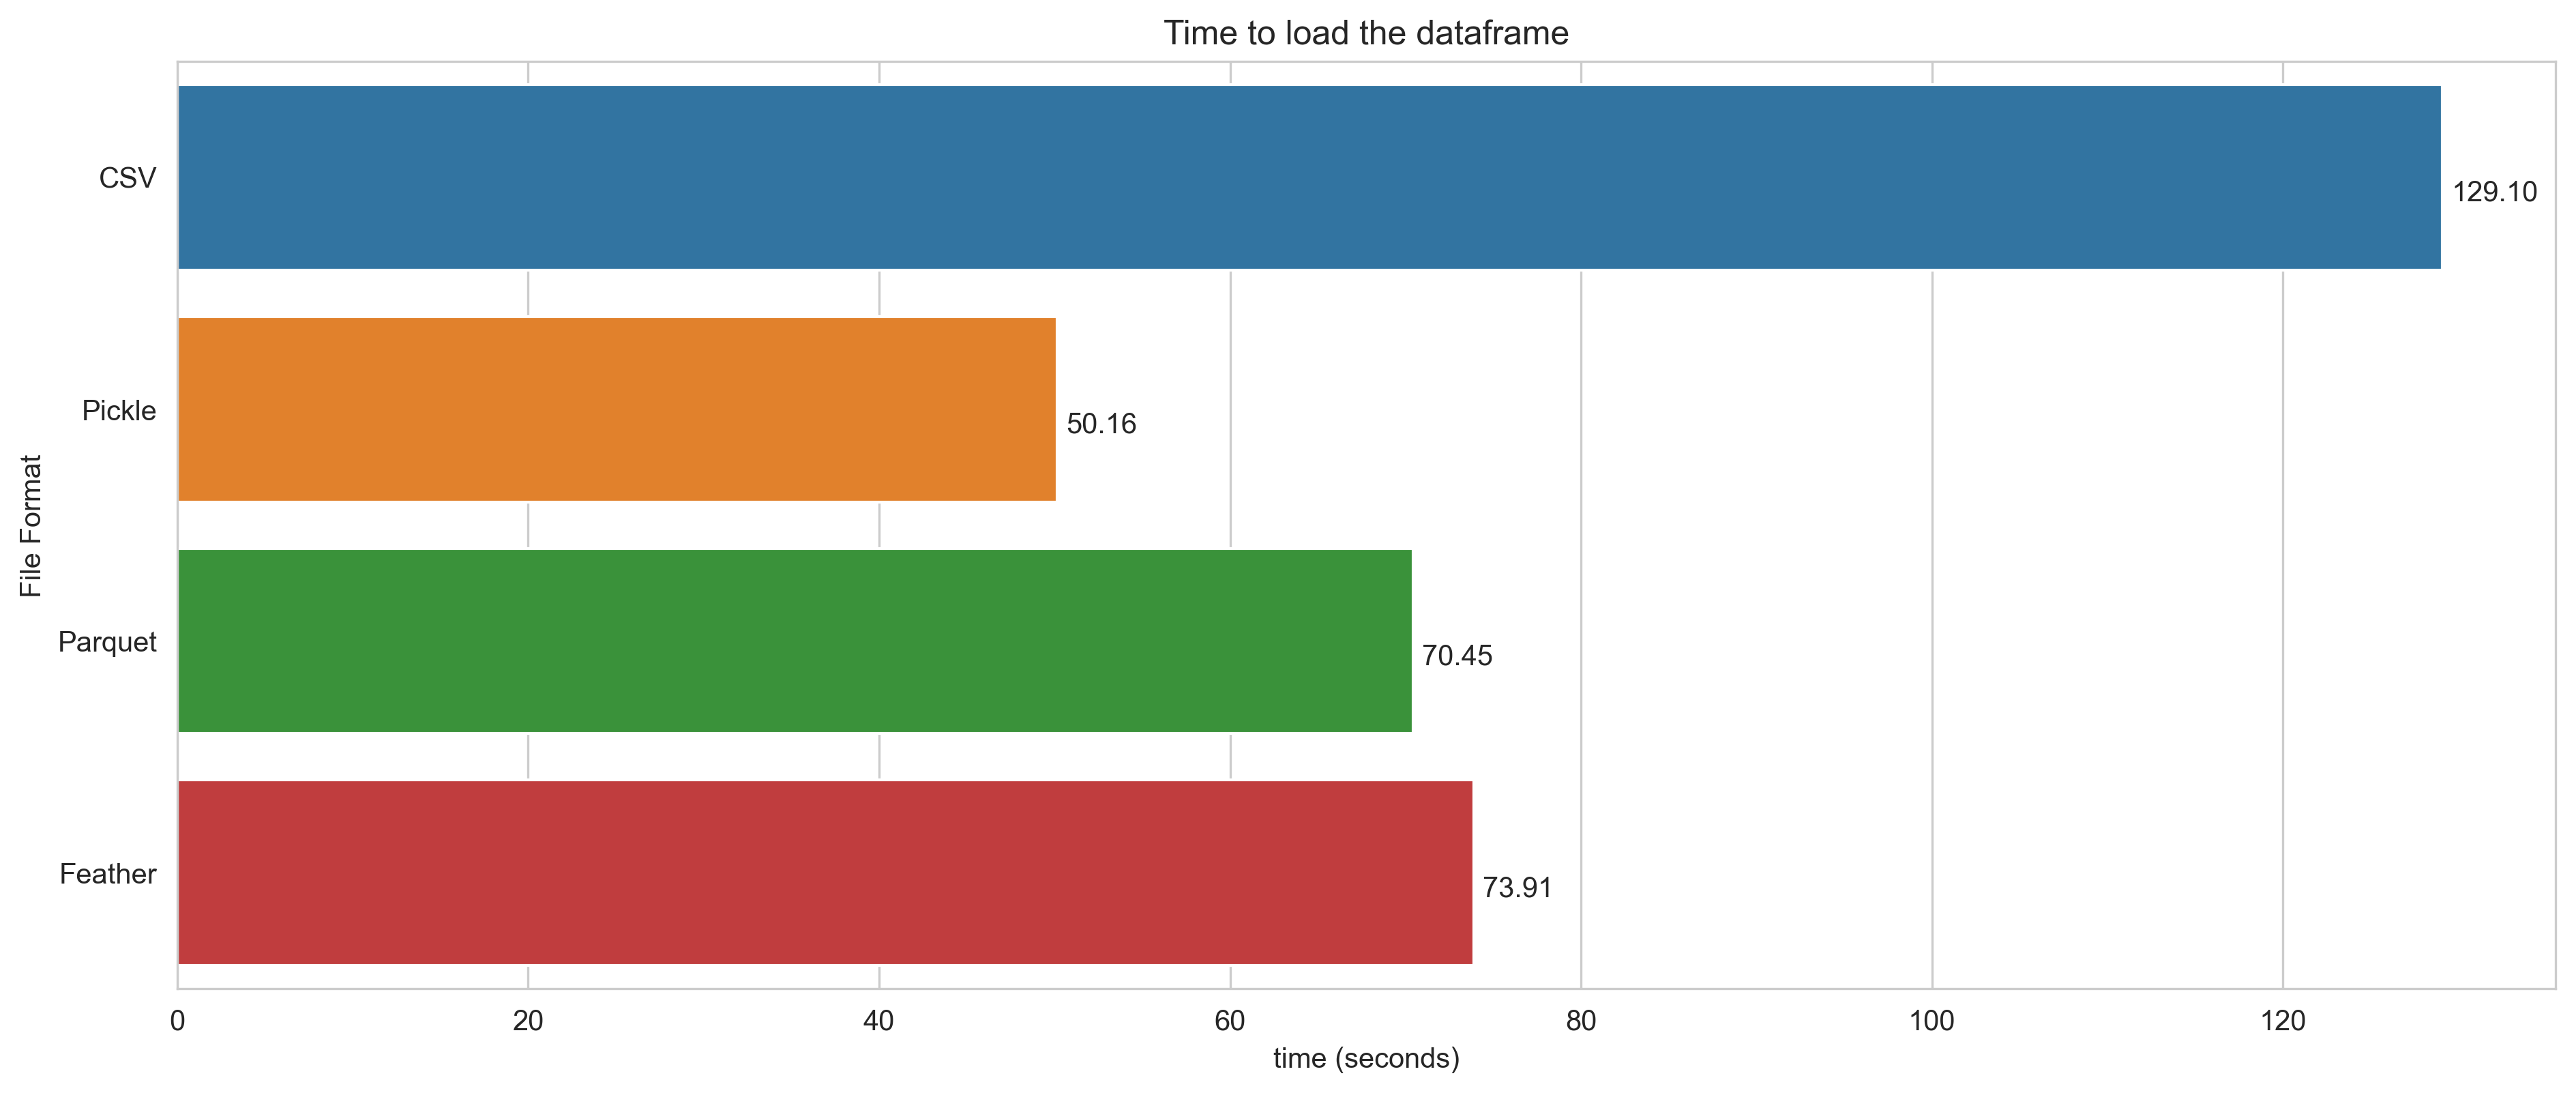

In [20]:
%matplotlib inline

file_type = ['CSV', 'Pickle', 'Parquet', 'Feather']
processing_time = [csv_time_read, pickle_time_read, parquet_time_read, feather_time_read]

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6), dpi=300)
plot = sns.barplot(x=processing_time, y=file_type, orient='h')

# Add labels and title
plt.xlabel('time (seconds)')
plt.ylabel('File Format')
plt.title("Time to load the dataframe")

# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.2f'), (p.get_width()+0.5, p.get_y()+0.5))
    
# Show the plot
plt.show()

### Note: read/load time will vary depending on the computer resources 

## Visualizing the disk size of each file

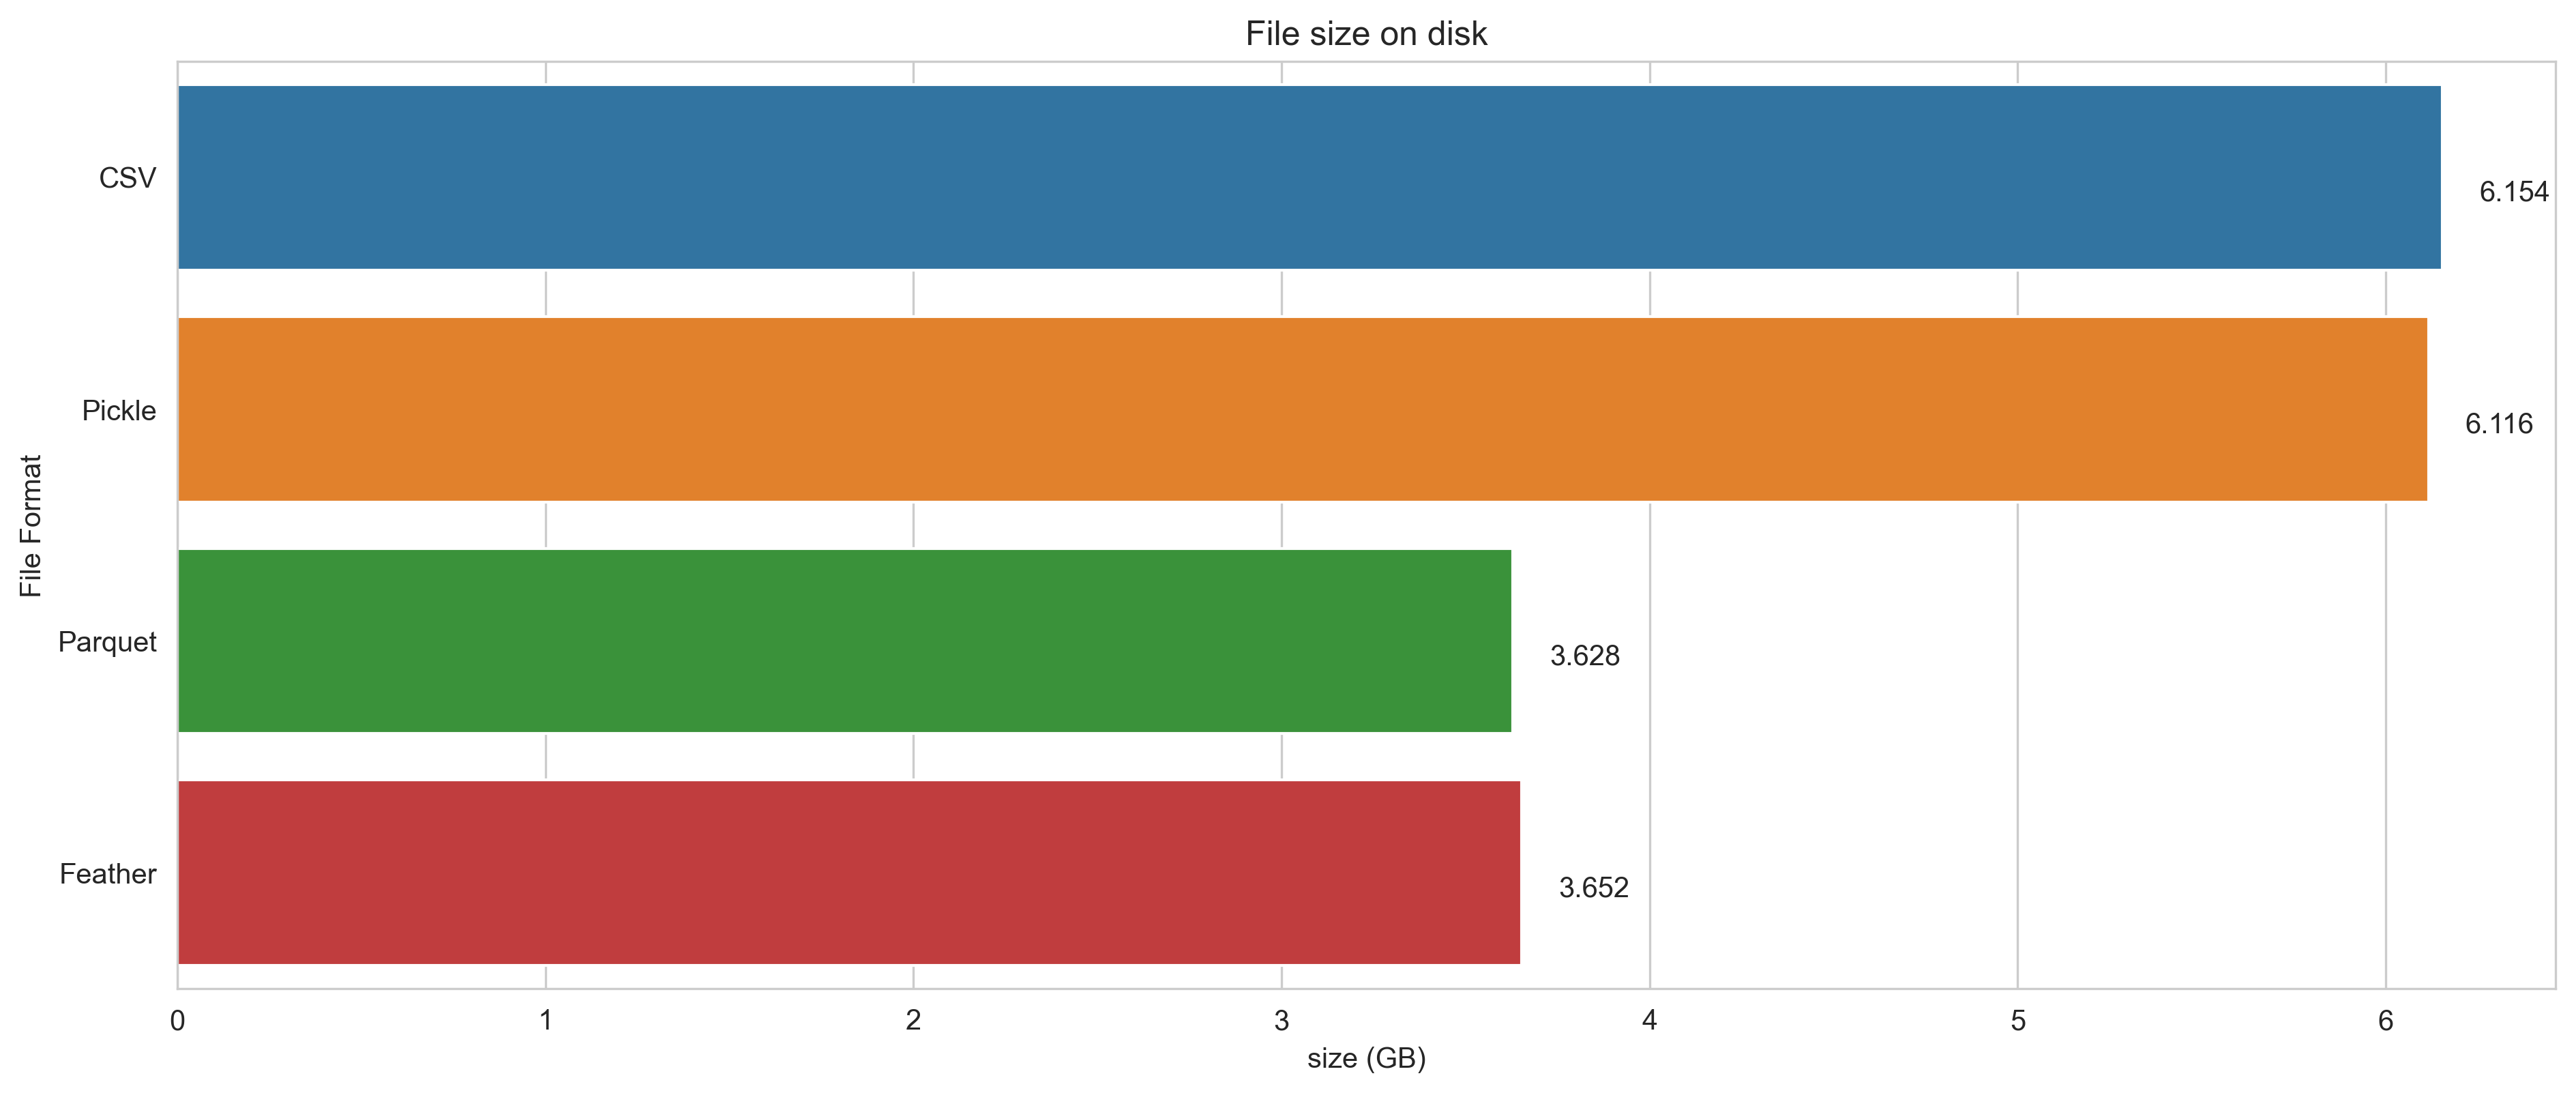

In [23]:
csv_size = round(os.path.getsize('df_result.csv')/ (1024**3), 3)
pickle_size = round(os.path.getsize('df_result.pickle')/ (1024**3), 3)
parquet_size = round(os.path.getsize('df_result.parquet')/ (1024**3), 3)
feather_size = round(os.path.getsize('df_result.feather')/ (1024**3), 3)

file_type = ['CSV', 'Pickle', 'Parquet', 'Feather']
processing_time = [csv_size, pickle_size, parquet_size, feather_size]

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6), dpi=300)
plot = sns.barplot(x=processing_time, y=file_type, orient='h')

# Add labels and title
plt.xlabel('size (GB)')
plt.ylabel('File Format')
plt.title("File size on disk")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.3f'), (p.get_width()+0.1, p.get_y()+0.5))
    
# Show the plot
plt.show()

### Reading url and text_length columns with Parquet

In [22]:
%%time
df = pd.read_parquet('df_result.parquet', columns = ['url', 'text_length'])
df

CPU times: total: 15.6 ms
Wall time: 95.6 ms


,url,text_length
0,https://www.smashwords.com/books/download/9331...,513685
1,https://www.smashwords.com/books/download/1029...,186430
2,https://www.smashwords.com/books/download/1233...,204298
3,https://www.smashwords.com/books/download/6365...,527243
4,https://www.smashwords.com/books/download/3613...,273111
...,...,...
17599,https://www.smashwords.com/books/download/1089...,273043
17600,https://www.smashwords.com/books/download/1040...,148081
17601,https://www.smashwords.com/books/download/1039...,192587
17602,https://www.smashwords.com/books/download/5955...,376935
